# Sentiment Analysis of Social Media

## About the dataset 

**Description** 

This is a dataset from [Kaggle](https://www.kaggle.com/datasets/gargmanas/sentimental-analysis-for-tweets). 

It collects twitters from users. There are three columns in the dataset, one 'index', one is 'message to examine'( twitter text), and one is 'label'(1 means depression and 0 means no depression).

The dataset was collected two years ago. 

**Research Question**

The goal is to train a model to predict whether a user has a tendency of depression based on twitter contents. Since the data alread has labels, it belongs to supervised learning. 

I am interested in using machine learning models to analyze social content, which I think can have a lot of posotive influences in our digital era.

**Algorithm**

Naive Bayes will be used in this task, since it is a pretty standard way to deal with NPL problems. 

## 1. Preprocessing 

In [1]:
# Import libraries and read the dataset 
import numpy as np
import pandas as pd 
data = pd.read_csv("/Users/dengyuqing/Desktop/Academics/23 Winter/IMT 574/PS4/sentiment_tweets3.csv")

In [2]:
# set_option to view full column in notebook
pd.set_option('display.max_colwidth', None)
# Take a glimpse of the data
data.head(10)

,Index,message to examine,label (depression result)
0,106,"just had a real good moment. i missssssssss him so much,",0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http://www.youtube.com/watch?v=zoGfqvh2ME8,0
3,288,"@lapcat Need to send 'em to my accountant tomorrow. Oddly, I wasn't even referring to my taxes. Those are supporting evidence, though.",0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
5,624,so sleepy. good times tonight though,0
6,701,"@SilkCharm re: #nbn as someone already said, does fiber to the home mean we will all at least be regular now",0
7,808,23 or 24ï¿½C possible today. Nice,0
8,1193,nite twitterville workout in the am -ciao,0
9,1324,"@daNanner Night, darlin'! Sweet dreams to you",0


In [3]:
data.shape

(10314, 3)

**Remove URLs,special character,symbles, etc.**

In [4]:
# Import libraries
import re, string 

In [5]:
def clean_text(text, patterns):
    for pattern in patterns:
        text = re.sub(pattern, '', text)
    return text
patterns = [r'http\S+', r"(?<![@\w])@(\w{1,25})", r"<[^>]+>", r'\n'] # patterns includes special charaters, URLs,mentions and line breaks
data['message to examine'] = data['message to examine'].apply(lambda x: clean_text(x, patterns))

In [6]:
data.head(10)

,Index,message to examine,label (depression result)
0,106,"just had a real good moment. i missssssssss him so much,",0
1,217,is reading manga,0
2,220,-,0
3,288,"Need to send 'em to my accountant tomorrow. Oddly, I wasn't even referring to my taxes. Those are supporting evidence, though.",0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
5,624,so sleepy. good times tonight though,0
6,701,"re: #nbn as someone already said, does fiber to the home mean we will all at least be regular now",0
7,808,23 or 24ï¿½C possible today. Nice,0
8,1193,nite twitterville workout in the am -ciao,0
9,1324,"Night, darlin'! Sweet dreams to you",0


As can be seen, there's still special characters like "#","-","'",etc. Keep removing those special character.

In [7]:
def remove_special_characters(text):
    pattern = r'[^a-zA-Z0-9\s]'  # regular expression pattern to match non-alphanumeric and non-whitespace characters
    text = re.sub(pattern, '', text) 
    return text

data['message to examine'] = data['message to examine'].apply(lambda x: remove_special_characters(x))

In [8]:
data.head(10)

,Index,message to examine,label (depression result)
0,106,just had a real good moment i missssssssss him so much,0
1,217,is reading manga,0
2,220,,0
3,288,Need to send em to my accountant tomorrow Oddly I wasnt even referring to my taxes Those are supporting evidence though,0
4,540,ADD ME ON MYSPACE myspacecomLookThunder,0
5,624,so sleepy good times tonight though,0
6,701,re nbn as someone already said does fiber to the home mean we will all at least be regular now,0
7,808,23 or 24C possible today Nice,0
8,1193,nite twitterville workout in the am ciao,0
9,1324,Night darlin Sweet dreams to you,0


**Drop columns that only have white space.**

In [9]:
data = data.drop(data[data['message to examine'].str.isspace()].index)
data.shape

(10293, 3)

**Lowercase**

In [10]:
# lowercase all strings in the dataset 
data = data.applymap(lambda x: x.lower() if isinstance(x, str) else x)

**Tokenization**

In [11]:
import nltk
from nltk.tokenize import TweetTokenizer

# create a tweet tokenizer object
tweet_tokenizer = TweetTokenizer()
# define a lambda function to tokenize a tweet
tokenize_tweet = lambda tweet: tweet_tokenizer.tokenize(tweet)
# apply the lambda function to the text column of the dataset
data['message to examine'] = data['message to examine'].apply(lambda tweet: tokenize_tweet(tweet))

data.head(5)

,Index,message to examine,label (depression result)
0,106,"[just, had, a, real, good, moment, i, missssssssss, him, so, much]",0
1,217,"[is, reading, manga]",0
3,288,"[need, to, send, em, to, my, accountant, tomorrow, oddly, i, wasnt, even, referring, to, my, taxes, those, are, supporting, evidence, though]",0
4,540,"[add, me, on, myspace, myspacecomlookthunder]",0
5,624,"[so, sleepy, good, times, tonight, though]",0


**Remove stop words**

In [12]:
import nltk
from nltk.corpus import stopwords # import stopwords

stop_words = set(stopwords.words('english')) # set language

#define a function to remove stopwords
def remove_stopwords(row):
    row = [w for w in row if w not in stop_words]
    return row

# apply the function to each row of the text column
data['message to examine'] = data['message to examine'].apply(lambda x: remove_stopwords(x))

**Stemming**

In [13]:
from nltk.stem import *
from nltk.stem.porter import *
stemmer = PorterStemmer()

# define function of stemming
def stemming(row):
    row = [stemmer.stem(token) for token in row]
    row = ' '.join(row) 
    return row

stem = lambda x: stemming(x)

# apply the function to each row of the text column
data['message to examine'] = data['message to examine'].apply(lambda x: stemming(x))

In [14]:
data.head(5)

,Index,message to examine,label (depression result)
0,106,real good moment missssssssss much,0
1,217,read manga,0
3,288,need send em account tomorrow oddli wasnt even refer tax support evid though,0
4,540,add myspac myspacecomlookthund,0
5,624,sleepi good time tonight though,0


## 2.Model Training

In [15]:
import sklearn
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix, recall_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from scipy import sparse
from nltk.probability import FreqDist
import seaborn as sns

**Split data into training set and testing set**

In [16]:
features=data.drop(['Index','label (depression result)'],axis=1)
y = data['label (depression result)'] 
# split data
X_train, X_test, y_train, y_test = train_test_split(features, y, random_state=45) 

**TF-IDF**

In [17]:
# Convert text into "tf-idf" vectors and apply to the 'message to examine' column of the training and test sets 

tfidf = TfidfVectorizer(ngram_range = (1,2))
tfidf_text_train = tfidf.fit_transform(X_train['message to examine'])
tfidf_text_test = tfidf.transform(X_test['message to examine'])

# convert the transformed data into sparse matrices

X_train = sparse.hstack([tfidf_text_train]).tocsr()
X_test = sparse.hstack([tfidf_text_test]).tocsr()

**Train NaiveBayes model**

In [18]:
nb_classifier = MultinomialNB(alpha = .05)
nb_classifier.fit(X_train, y_train)
nb_test_preds = nb_classifier.predict(X_test)

**Model Performance**

In [19]:
# Report Accuracy

print('Accuracy of testing data is {}'.format(accuracy_score(y_test,nb_test_preds)))

Accuracy of testing data is 0.9549339549339549


**Tinker with parameters(modifying hyperparemeter)**

In [21]:
# Change alpha to 0.0001
nb_classifier = MultinomialNB(alpha = .00001)
nb_classifier.fit(X_train, y_train)
nb_train_preds = nb_classifier.predict(X_train)
nb_test_preds = nb_classifier.predict(X_test)

print('Accuracy of testing data is {}'.format(accuracy_score(y_test,nb_test_preds)))

Accuracy of testing data is 0.9254079254079254


In [22]:
# Change alpha to 0.1
nb_classifier = MultinomialNB(alpha = .1)
nb_classifier.fit(X_train, y_train)
nb_train_preds = nb_classifier.predict(X_train)
nb_test_preds = nb_classifier.predict(X_test)

print('Accuracy of testing data is {}'.format(accuracy_score(y_test,nb_test_preds)))

Accuracy of testing data is 0.9529914529914529


In [23]:
# Change alpha to 0.02
nb_classifier = MultinomialNB(alpha =0.02)
nb_classifier.fit(X_train, y_train)
nb_train_preds = nb_classifier.predict(X_train)
nb_test_preds = nb_classifier.predict(X_test)

print('Accuracy of testing data is {}'.format(accuracy_score(y_test,nb_test_preds)))

Accuracy of testing data is 0.9467754467754468


In [24]:
# Change alpha to 5.0
nb_classifier = MultinomialNB(alpha =5.0)
nb_classifier.fit(X_train, y_train)
nb_train_preds = nb_classifier.predict(X_train)
nb_test_preds = nb_classifier.predict(X_test)

print('Accuracy of testing data is {}'.format(accuracy_score(y_test,nb_test_preds)))

Accuracy of testing data is 0.7975912975912975


Performance changes while I modify alpha values. The difference is not that difference when alpha is set to 0.00001,0.1,0.02. But performance drops a lot when alpha is set to 5.0.  

**Some visualization**

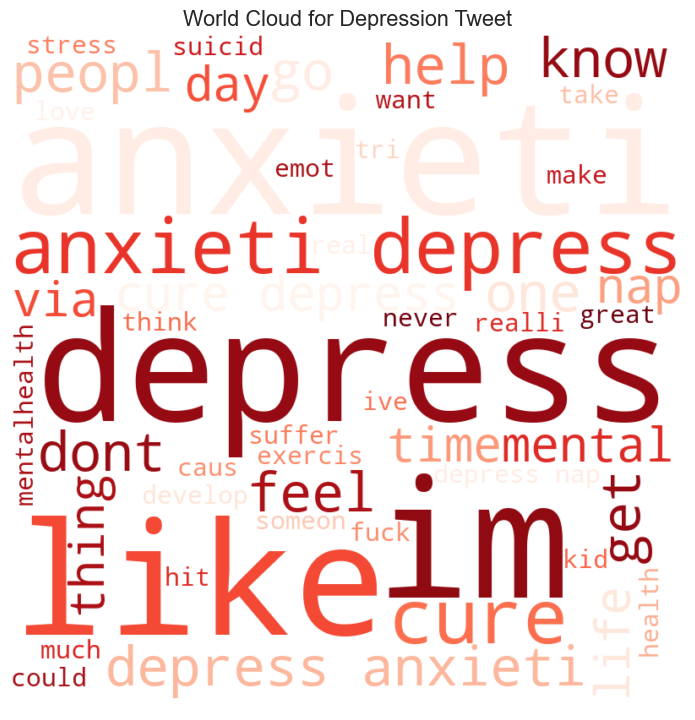

In [25]:
from wordcloud import WordCloud

# Top words for depression class
pos_class_prob_sorted = nb_classifier.feature_log_prob_[1, :].argsort()[::-1]
top_pos_words = np.take(tfidf.get_feature_names_out(), pos_class_prob_sorted[:50])
top_pos_word_probs = np.take(nb_classifier.feature_log_prob_[1, :], pos_class_prob_sorted[:50])

# Create a dictionary of word-frequency pairs
word_freq = {}
for i in range(len(top_pos_words)):
    word_freq[top_pos_words[i]] = top_pos_word_probs[i]

# Create a WordCloud object
wc = WordCloud(width=800, height=800, background_color='white', max_words=50, colormap='Reds').generate_from_frequencies(word_freq)

# Plot the WordCloud
plt.figure(figsize=(8,7))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('World Cloud for Depression Tweet')
plt.tight_layout(pad=0)
plt.show()


This graph shows some of the highly distributed words in tweets which are showing depression. Some of the words are directly related to this blue emotion, but some are not. Contexts are very important. 

## Discussion

**Challenges** 

One of the challenge is to visualize the dataset. Since it's text model, it's not good to visualize using scatter plot, pie chart, etc. Although I can show plots such as how many people are expressing depression, but I don't see the point of such plots. Finally I find the plot type word cloud, which is perfect for text analysis. There must be other ways to visualize text information, and I would like to explore them in the future. 

**Benifits and Harms**

Benifits:
(1)It can be used to detect users who have depression tendency and initiate some kind of auto trigger interventions.
(2)It can be used to analyze lifelihood and happiness of the society in total. For example, if in some period of time, many social media users are showing tendency of depression, this may indicate that people are generally not happy, and their must be reasons behind this social emotion. 
Harms:
(1)Since context is very important, it is likely that this model is totally mistaken in detecting depression. If we have some kind of interventions, it would be annoying to users.
(2)Some organizations like pharmaceutical companies would be interested in using this kind of model to marketing directly to potential customers. They may want to try their best to find data and violate customer privacy in some cases. 

**Furthr Research Question**

Labeling data as 1 and 0 is the easiest way to model, but this does not reflect the complexity of human emotions. In the future I would like to explore sentiment analysis grouped by different emotional levels.Besides, it is no that easy to have labeled data. I would like to explore ways to do unsupervised clustering job on tweet data. 